# Streaming App Customer Review Analysis

Since Covid, Streaming Apps become more and more popular across different generations. However, it is challenging to know how do users feel about these Apps and how their feeling change after the pandemic just by looking at the one or two reviews. Therefore, this project aims to use thousands of customer reviews on apple appstore to analyze quality of popular streaming apps including Netflix, Disney+, Hulu, and Amazon Prime across time. At the end, you will find out how do users feel about these apps and how can company focus on specific types of reviews to help improve their product.

In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [143]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from app_store_scraper import AppStore
import random

### Web Scraping - Apple AppStore API

To get the data, I used AppStore package in Python to scrape the reviews from Netflix, Disney+, Hulu, and Amazon Prime. Eventually, I scraped 7,209 reviews from these apps.

In [145]:
# Disney_plus = AppStore(country='us', app_name='disney', app_id = '1446075923')
# Disney_plus.review(how_many=3000, after=dt.datetime(2019, 7, 1))

In [146]:
# Disney_plusdf = pd.DataFrame(np.array(Disney_plus.reviews),columns=['review'])
# Disney_plusdf2 = Disney_plusdf.join(pd.DataFrame(Disney_plusdf.pop('review').tolist()))
# Disney_plusdf2.head()

In [147]:
# Disney_plusdf2.to_csv('Disney-plus-app-reviews.csv')

In [148]:
# amazon_prime_video = AppStore(country='us', app_name='amazon-prime-video', app_id = '545519333')
# amazon_prime_video.review(how_many=3000, after=dt.datetime(2019, 7, 1))

In [149]:
# amazon_prime_videodf = pd.DataFrame(np.array(amazon_prime_video.reviews),columns=['review'])
# amazon_prime_videodf2 = amazon_prime_videodf.join(pd.DataFrame(amazon_prime_videodf.pop('review').tolist()))
# amazon_prime_videodf2.head()

In [150]:
# amazon_prime_videodf2.to_csv('amazon_prime_video-reviews.csv')

In [151]:
# hulu_watch_tv_shows_movies = AppStore(country='us', app_name='hulu-watch-tv-shows-movies', app_id = '376510438')
# hulu_watch_tv_shows_movies.review(how_many=3000, after=dt.datetime(2019, 7, 1))

In [152]:
# hulu_watch_tv_shows_moviesdf = pd.DataFrame(np.array(hulu_watch_tv_shows_movies.reviews),columns=['review'])
# hulu_watch_tv_shows_moviesdf2 = hulu_watch_tv_shows_moviesdf.join(pd.DataFrame(hulu_watch_tv_shows_moviesdf.pop('review').tolist()))
# hulu_watch_tv_shows_moviesdf2.head()

In [153]:
# hulu_watch_tv_shows_moviesdf2.to_csv('hulu_watch_tv_shows_movies.csv')

In [6]:
Netflix =  pd.read_csv('Netflix-app-reviews.csv')
Disney_plus = pd.read_csv('Disney-plus-app-reviews.csv')
amazon_prime_video = pd.read_csv('amazon_prime_video-reviews.csv')
hulu = pd.read_csv("hulu_watch_tv_shows_movies.csv")

In [16]:
Netflix['App'] = 'Netflix'
Disney_plus['App'] = 'Disney plus'
amazon_prime_video['App'] = 'amazon prime video'
hulu['App'] = 'hulu'

In [17]:
result_df = pd.concat([Netflix, Disney_plus,amazon_prime_video,hulu], ignore_index=True)

I started to do EDA with the reviews.

In [18]:
result_df['date'] = pd.to_datetime(result_df['date'])

In [10]:
result_df = result_df.set_index('date')

In [19]:
result_df.head(1)

,Unnamed: 0,date,review,rating,isEdited,title,userName,App,developerResponse
0,0,2021-10-05 03:57:33,Overall a great app but there are some things ...,4,False,PLEASE READ NETFLIX,SERIOUS PERSON PLEASE READ,Netflix,NaN


In [12]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7209 entries, 2021-10-05 03:57:33 to 2023-01-30 02:09:52
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7209 non-null   int64 
 1   review             7209 non-null   object
 2   rating             7209 non-null   int64 
 3   isEdited           7209 non-null   bool  
 4   title              7209 non-null   object
 5   userName           7209 non-null   object
 6   App                7209 non-null   object
 7   developerResponse  42 non-null     object
dtypes: bool(1), int64(2), object(5)
memory usage: 457.6+ KB


In [13]:
result_df['rating'].describe()

count    7209.000000
mean        3.152310
std         1.452196
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [14]:
result_df.groupby('App')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
App,,,,,,,,
Disney plus,2080.0,3.612019,1.308186,1.0,3.0,4.0,5.0,5.0
Netflix,1371.0,3.226842,1.464034,1.0,2.0,4.0,4.0,5.0
amazon prime video,1300.0,3.486154,1.498460,1.0,2.0,4.0,5.0,5.0
hulu,2458.0,2.545159,1.321604,1.0,1.0,2.0,4.0,5.0


### Rating Distribution 

#### Overall

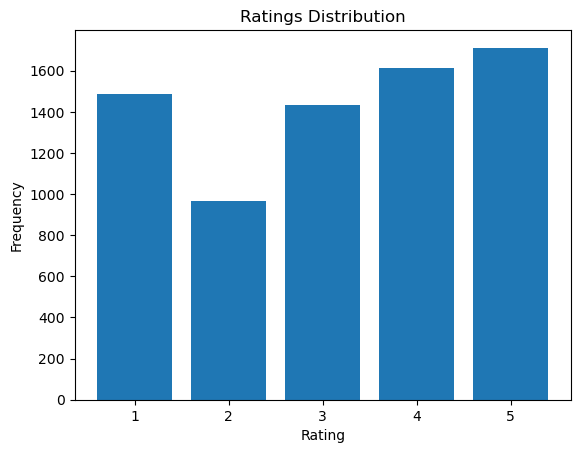

In [10]:
bin_edges = np.arange(result_df['rating'].min() - 0.5, result_df['rating'].max() + 1.5, 1)
plt.hist(result_df['rating'], bins=bin_edges, align='mid', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')
plt.show()

#### Netflix

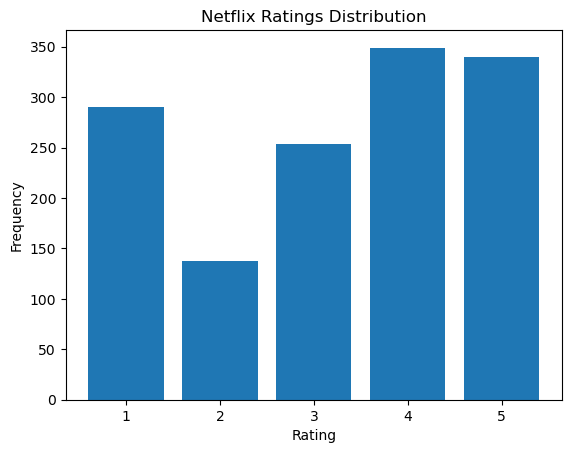

In [11]:
Netflix_df = result_df[result_df['App']=='Netflix']
bin_edges = np.arange(Netflix_df['rating'].min() - 0.5, Netflix_df['rating'].max() + 1.5, 1)
plt.hist(Netflix_df['rating'], bins=bin_edges, align='mid', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Netflix Ratings Distribution')
plt.show()

#### Disney plus

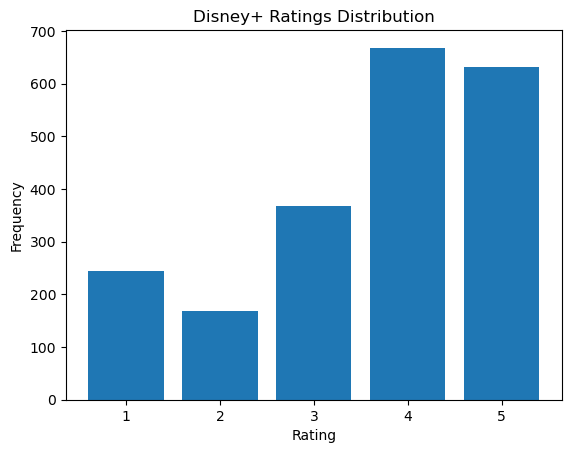

In [12]:
Disney_df = result_df[result_df['App']=='Disney plus']
bin_edges = np.arange(Disney_df['rating'].min() - 0.5, Disney_df['rating'].max() + 1.5, 1)
plt.hist(Disney_df['rating'], bins=bin_edges, align='mid', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Disney+ Ratings Distribution')
plt.show()

#### Amazon Prime Video

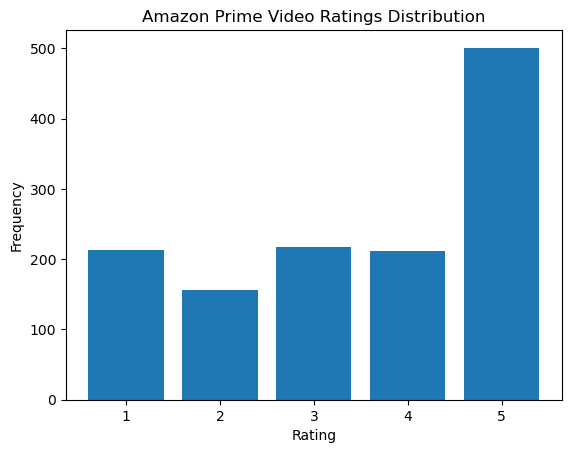

In [13]:
amazon_prime_video_df = result_df[result_df['App']=='amazon prime video']
bin_edges = np.arange(amazon_prime_video_df['rating'].min() - 0.5, amazon_prime_video_df['rating'].max() + 1.5, 1)
plt.hist(amazon_prime_video_df['rating'], bins=bin_edges, align='mid', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Amazon Prime Video Ratings Distribution')
plt.show()

#### Hulu

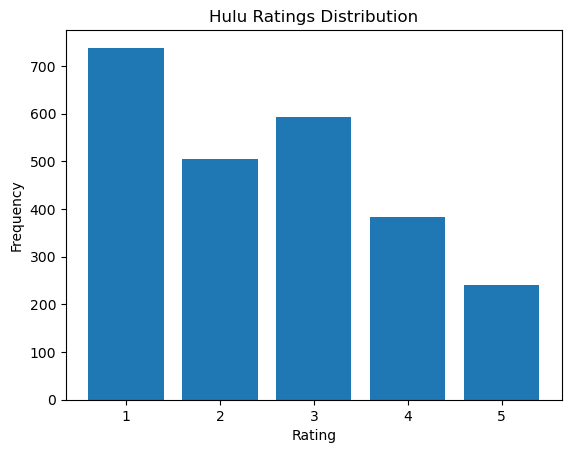

In [14]:
hulu_df = result_df[result_df['App']=='hulu']
bin_edges = np.arange(hulu_df['rating'].min() - 0.5, hulu_df['rating'].max() + 1.5, 1)
plt.hist(hulu_df['rating'], bins=bin_edges, align='mid', rwidth=0.8)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Hulu Ratings Distribution')
plt.show()

#### Average Rating by Month

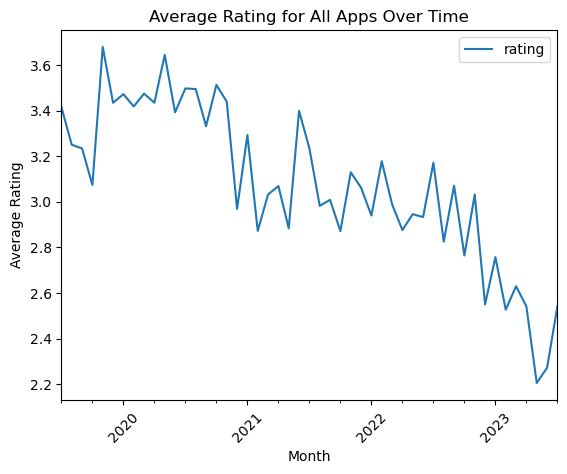

In [158]:
result_df.groupby(pd.Grouper(freq="M")).rating.mean().plot()
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.title("Average Rating for All Apps Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

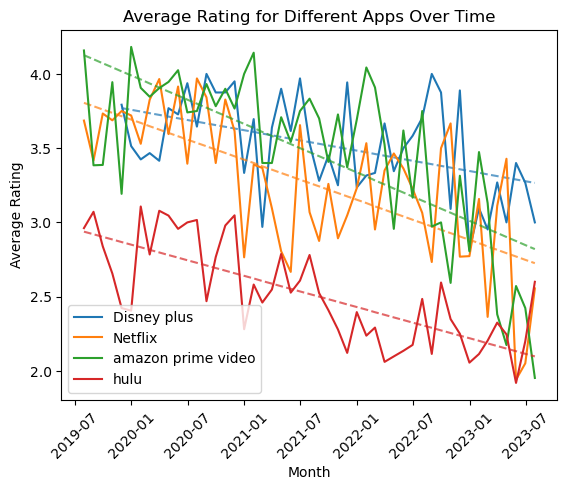

In [17]:
grouped_data = result_df.groupby(['App', pd.Grouper(freq="M")]).rating.mean()


for app_name, group_data in grouped_data.groupby(level=0):
    line, = plt.plot(group_data.index.get_level_values("date"), group_data.values, label=app_name)    
    x = np.arange(len(group_data.index))
    coeffs = np.polyfit(x, group_data.values, deg=1)    
    y_pred = coeffs[0] * x + coeffs[1]
    color = line.get_color()
    plt.plot(group_data.index.get_level_values("date"), y_pred, linestyle='--', alpha=0.7, color=color)

plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.title("Average Rating for Different Apps Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [18]:
df_pivot = result_df.reset_index()
df_pivot['month'] = df_pivot['date'].dt.month
df_pivot['year'] = df_pivot['date'].dt.year
df_pivot = pd.pivot_table(df_pivot, values='rating', index=['year','month'],
                      columns='App' , aggfunc=np.mean)

In [19]:
df_pivot.corr()


App,Disney plus,Netflix,amazon prime video,hulu
App,,,,
Disney plus,1.000000,0.318946,0.435633,0.385507
Netflix,0.318946,1.000000,0.488062,0.563333
amazon prime video,0.435633,0.488062,1.000000,0.470026
hulu,0.385507,0.563333,0.470026,1.000000


#### Whether developer response or not

In [20]:
result_df[result_df['developerResponse'].isnull()==False]['App'].value_counts()

Disney plus    40
hulu            2
Name: App, dtype: int64

##### Disney Plus

In [21]:
result_df[(result_df['developerResponse'].isnull()==False) & (result_df['App']=='Disney plus')]['developerResponse'].head(5)

date
2019-11-18 04:30:44    {'id': 12093769, 'body': 'Hello. Thank you for...
2019-11-13 03:17:08    {'id': 12093766, 'body': 'Hello. Thank you for...
2019-11-14 02:45:58    {'id': 12093802, 'body': 'Hello. Thank you for...
2019-11-28 08:07:20    {'id': 12093941, 'body': 'Hello. Thank you for...
2019-11-18 04:15:53    {'id': 12093895, 'body': 'Hello. Thank you for...
Name: developerResponse, dtype: object

In [159]:
pd.set_option('display.max_colwidth', None)

result_df[(result_df['developerResponse'].isnull()==False) & (result_df['App']=='Disney plus')]['developerResponse'].str.extract(r"'body': '(.*?)'").head(5)

,0
date,
2019-11-18 04:30:44,Hello. Thank you for your feedback. We’ve just made an update to the Disney+ app that includes fixes for continue watching and resume play. Update to the latest version and let us know what you think!
2019-11-13 03:17:08,Hello. Thank you for your feedback. We’ve just made an update to the Disney+ app that includes fixes for continue watching and resume play. Update to the latest version and let us know what you think!
2019-11-14 02:45:58,Hello. Thank you for your feedback. We’ve just made an update to the Disney+ app that includes fixes for continue watching and resume play. Update to the latest version and let us know what you think!
2019-11-28 08:07:20,Hello. Thank you for your feedback. We’ve just made an update to the Disney+ app that includes fixes for continue watching and resume play. Update to the latest version and let us know what you think!
2019-11-18 04:15:53,Hello. Thank you for your feedback. We’ve just made an update to the Disney+ app that includes fixes for continue watching and resume play. Update to the latest version and let us know what you think!


In [23]:
print("Average reviews rate that developer replied:",result_df[(result_df['developerResponse'].isnull()==False) & (result_df['App']=='Disney plus')]['rating'].mean())
print("Average reviews rate that developer didn't reply:",result_df[(result_df['developerResponse'].isnull()==True) & (result_df['App']=='Disney plus')]['rating'].mean())

Average reviews rate that developer replied: 3.75
Average reviews rate that developer didn't reply: 3.609313725490196


##### Hulu

In [24]:
pd.set_option('display.max_colwidth', None)

result_df[(result_df['developerResponse'].isnull()==False) & (result_df['App']=='hulu')]['developerResponse']

date
2020-01-24 23:31:42                                                                                                                                                                                                                                                                                {'id': 2265867, 'body': "We greatly appreciate the feedback; thanks for sharing. We're always looking for ways to improve the overall experience so we'll definitely be sharing your concerns regarding the sensitivity of the playback controls with the rest of the team.", 'modified': '2018-01-10T22:30:57Z'}
2022-09-06 07:22:46    {'id': 2164318, 'body': "Thanks for reviewing the app — we greatly appreciate the feedback. If you're trying to connect to your TV via HDMI or Airplay, we're sorry to report that neither setup is currently supported which is likely why you're having playback trouble when doing so. That being said, we are working to expand our HDMI and Airplay compatibility in the future so

In [25]:
print("Average reviews rate that developer replied:", result_df[(result_df['developerResponse'].isnull()==False) & (result_df['App']=='hulu')]['rating'].mean())
print("Average reviews rate that developer didn't reply:", result_df[(result_df['developerResponse'].isnull()==True) & (result_df['App']=='hulu')]['rating'].mean())

Average reviews rate that developer replied: 3.0
Average reviews rate that developer didn't reply: 2.544788273615635


In [26]:
pd.reset_option('display.max_colwidth')

## Text Analytics

#### Text preprocessing

In [27]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
import re

In [160]:
# stop_words = set(stopwords.words('english'))
# nltk.download('punkt')

In [30]:
stop_words = set(stopwords.words('english'))

def remove_stopwords_and_punctuation(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    
    # Remove all non-alphanumeric characters using regular expression
    filtered_tokens = [re.sub(r'\W+', '', word) for word in filtered_tokens]
    
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'review_cleaned' column
result_df['review_cleaned'] = result_df['review'].apply(remove_stopwords_and_punctuation)

In [31]:
def clean_review(review):
    review = review.lower()
    review = review.replace("disney", "").replace("amazon", "").replace("prime", "").replace("amazon prime", "").replace("netflix", "").replace("hulu", "").replace("disney plus", "").replace("disney +", "").replace("disney+", "").strip()
    temp_list = [i.strip() for i in review.split(" ")]
    temp_list = [i for i in temp_list if i]
    return " ".join(temp_list)

In [32]:
result_df['review_cleaned'] = result_df['review_cleaned'].apply(clean_review)

In [161]:
lemmatizer = WordNetLemmatizer()

In [34]:
def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    
    return ' '.join(lemmatized_tokens)

# Apply the lemmatize_text function to the 'review_cleaned' column
result_df['review_cleaned'] = result_df['review_cleaned'].apply(lemmatize_text)


In [35]:
result_df

,Unnamed: 0,review,rating,isEdited,title,userName,App,developerResponse,review_cleaned
date,,,,,,,,,
2021-10-05 03:57:33,0,Overall a great app but there are some things ...,4,False,PLEASE READ NETFLIX,SERIOUS PERSON PLEASE READ,Netflix,NaN,overall great app thing could better please ad...
2023-05-10 14:20:32,1,i thought it was great that i got this subscri...,2,False,hacker in my neighborhood taking over my netflix,hacked out in tomball,Netflix,NaN,thought great got subscription tmobile life ac...
2021-12-30 14:48:36,2,1. There should be a feature where you have to...,4,False,Could be better,BlazeeOfficial,Netflix,NaN,1 feature enter account password many people e...
2022-10-25 17:26:12,3,I have been using Netflix for years now. It is...,5,False,Wow!,Rising17,Netflix,NaN,using year amazing unlimited show age show typ...
2022-03-13 15:55:06,4,I was scrolling through Netflix and I had a wo...,4,False,IDEA FROM A CONSUMER/VIEWER.,AwesoMapes,Netflix,NaN,scrolling wonderful thought decided act write ...
...,...,...,...,...,...,...,...,...,...
2023-04-12 12:07:09,2453,Please fix the audio! It will not play the sou...,1,False,😡,Lovelee212,hulu,NaN,please fix audio play sound open app unless cl...
2022-12-03 04:56:43,2454,"This app has been getting stuck and buffering,...",3,False,Needs to stop buffering,Tinacology,hulu,NaN,app getting stuck buffering annoying sure wort...
2023-02-08 10:24:41,2455,Very buggy app! Seems to have a mind of its ow...,2,False,Freezes and stops out of the blue.,truth bomb 73,hulu,NaN,buggy app seems mind freeze randomly even last...


### Popular Words

In [36]:
words_freq = Counter()
all_words = result_df['review_cleaned'].unique()

for word in all_words:
    # Convert the review to lowercase and split it into words
    word_list = str(word).lower().split()

    # Remove stopwords from the word list
    filtered_words = [w for w in word_list if w not in stop_words]

    # Update the word frequency counter
    words_freq.update(filtered_words)


In [37]:
key_words = [word for (word,_) in words_freq.most_common(30)]
print(key_words)

['show', 'app', 'watch', 'movie', 'like', 'watching', 'episode', 'time', 'get', 'would', 'one', 'love', 'tv', 'ad', 'thing', 'even', 'really', 'also', 'back', 'go', 'great', 'good', 'please', 'want', 'make', 'work', 'service', 'every', 'issue', 'season']


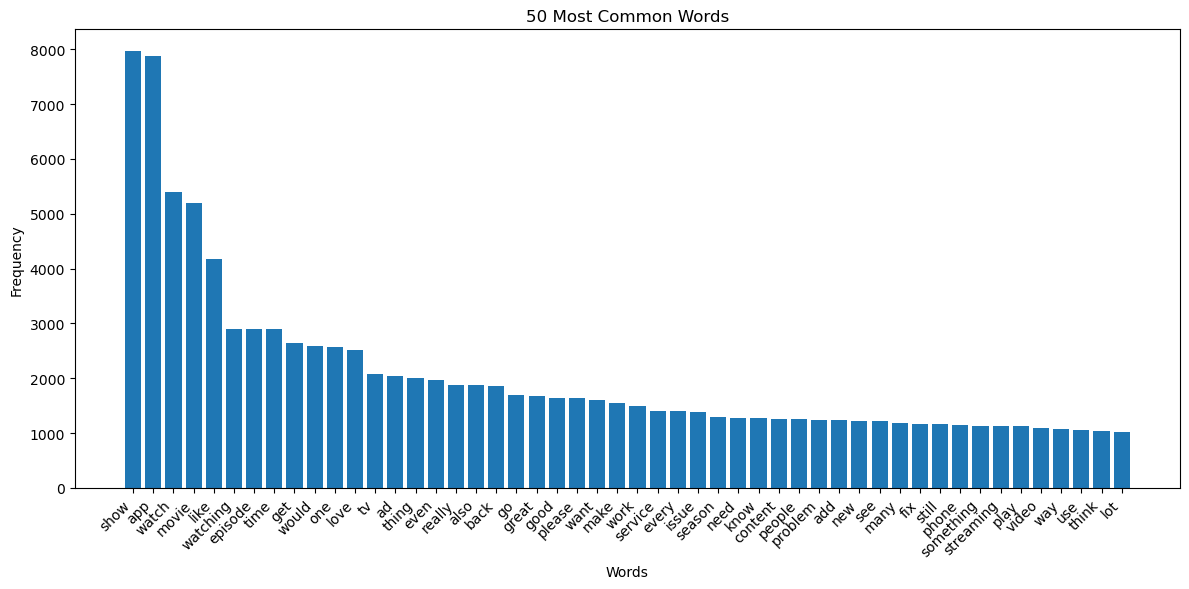

In [38]:
common_words = words_freq.most_common(50)
words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('50 Most Common Words')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [39]:
result_df["category"] = np.where(result_df['rating']>3,'High',np.where(result_df['rating']==3,'Medium','Low'))

#### High Rating

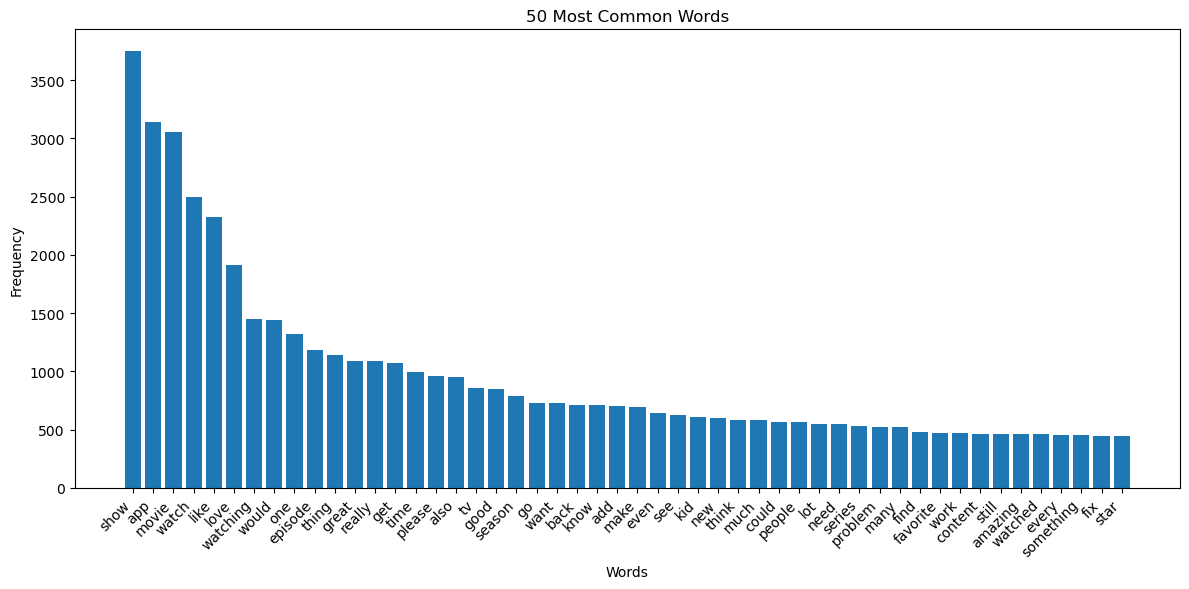

In [40]:
words_freq = Counter()
all_words = result_df[result_df['category']=='High']['review_cleaned'].unique()

for word in all_words:
    # Convert the review to lowercase and split it into words
    word_list = str(word).lower().split()

    # Remove stopwords from the word list
    filtered_words = [w for w in word_list if w not in stop_words]

    # Update the word frequency counter
    words_freq.update(filtered_words)
    
common_words = words_freq.most_common(50)
words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('50 Most Common Words')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Medium Rating

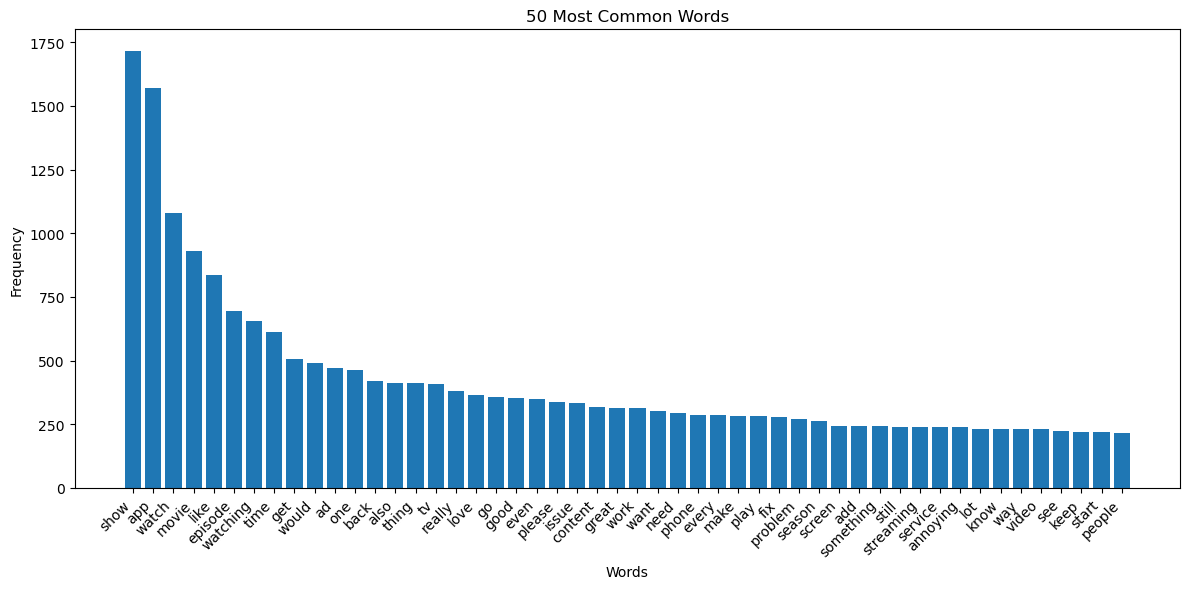

In [41]:
words_freq = Counter()
all_words = result_df[result_df['category']=='Medium']['review_cleaned'].unique()

for word in all_words:
    # Convert the review to lowercase and split it into words
    word_list = str(word).lower().split()

    # Remove stopwords from the word list
    filtered_words = [w for w in word_list if w not in stop_words]

    # Update the word frequency counter
    words_freq.update(filtered_words)
    
common_words = words_freq.most_common(50)
words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('50 Most Common Words')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Low Rating

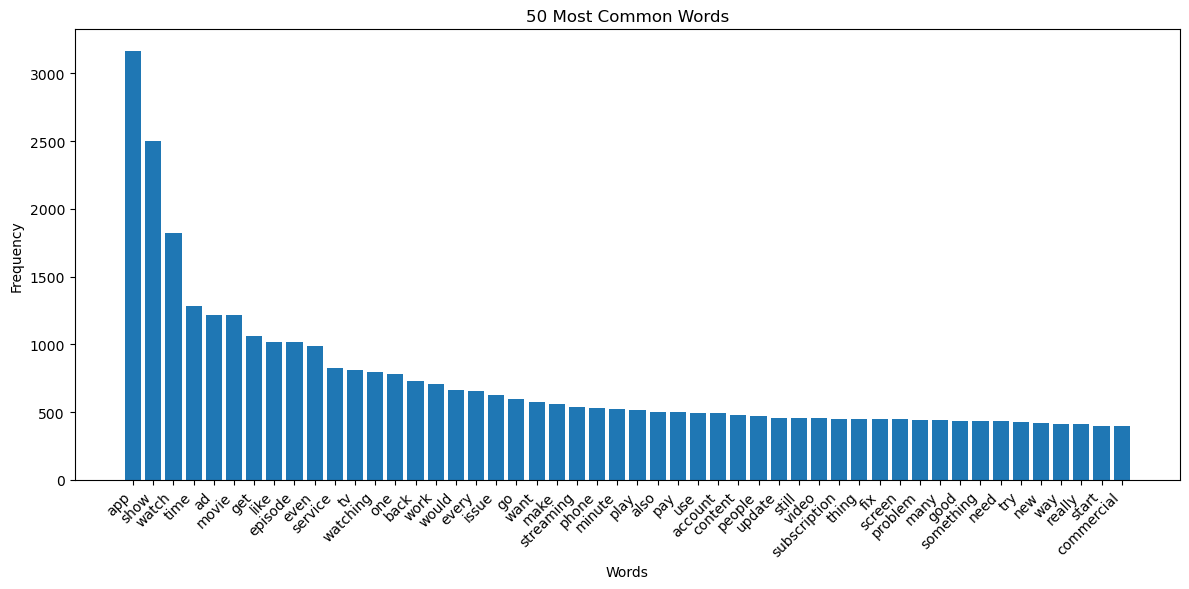

In [42]:
words_freq = Counter()
all_words = result_df[result_df['category']=='Low']['review_cleaned'].unique()

for word in all_words:
    # Convert the review to lowercase and split it into words
    word_list = str(word).lower().split()

    # Remove stopwords from the word list
    filtered_words = [w for w in word_list if w not in stop_words]

    # Update the word frequency counter
    words_freq.update(filtered_words)
    
common_words = words_freq.most_common(50)
words, frequencies = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('50 Most Common Words')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### NRC Lexicon - Emotion Prediction

In [43]:
from nrclex import NRCLex

In [44]:
review_list = result_df['review_cleaned'].tolist()

In [45]:
emotion_list = []
for i in range(len(review_list)):
    emotion = NRCLex(review_list[i])
    emotion_list.append(emotion.top_emotions) 

In [46]:
emotions_only = [[emotion[0] for emotion in emotions] for emotions in emotion_list]

In [47]:
emotion_df = pd.DataFrame(columns=[
'fear',
'anger',
'anticipation',
'trust',
'surprise',
'positive',
'negative',
'sadness',
'disgust',
'joy'])

for i in range(len(emotions_only)):
    fear=anger=anticipation=trust=surprise=positive=negative=sadness=disgust=joy = 0
    for j in range (len(emotions_only[i])):
        if emotions_only[i][j] == 'fear': fear = 1 
        if emotions_only[i][j] == 'anger': anger = 1 
        if emotions_only[i][j] == 'anticipation': anticipation = 1
        if emotions_only[i][j] == 'trust': trust = 1
        if emotions_only[i][j] == 'surprise': surprise = 1
        if emotions_only[i][j] == 'positive': positive = 1
        if emotions_only[i][j] == 'negative': negative = 1
        if emotions_only[i][j] == 'sadness': sadness = 1
        if emotions_only[i][j] == 'disgust': disgust = 1
        if emotions_only[i][j] == 'joy': joy = 1
    temp_df = {'fear': fear,'anger': anger,'anticipation': anticipation,'trust': trust,'surprise': surprise,'positive': positive,'negative':negative,'sadness':sadness,'disgust':disgust,'joy':joy}
    emotion_df = emotion_df.append(temp_df, ignore_index = True)

C:\Users\brigh\AppData\Local\Temp\ipykernel_28760\1062769227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(temp_df, ignore_index = True)
C:\Users\brigh\AppData\Local\Temp\ipykernel_28760\1062769227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(temp_df, ignore_index = True)
C:\Users\brigh\AppData\Local\Temp\ipykernel_28760\1062769227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emotion_df = emotion_df.append(temp_df, ignore_index = True)
C:\Users\brigh\AppData\Local\Temp\ipykernel_28760\1062769227.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emoti

In [48]:
emotion_df.index = result_df.index

In [49]:
final_df = result_df.join(emotion_df)

You can see low rating reviews have way higher negative emotion

In [50]:
final_df.groupby('category').negative.mean()

category
High      0.139892
Low       0.288219
Medium    0.200419
Name: negative, dtype: float64

### Cluter Customer Review

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tf_idf = TfidfVectorizer()

In [53]:
review_tfidf = tf_idf.fit_transform(review_list)

In [54]:
review_tfidf.shape

(7209, 13227)

In [55]:
tf_idf = TfidfVectorizer(min_df=5, ngram_range=(1,2))

In [56]:
review_tfidf = tf_idf.fit_transform(review_list)

In [57]:
review_tfidf.shape

(7209, 12220)

#### Dimension Reduction

In [58]:
from sklearn.decomposition import TruncatedSVD
import umap

In [59]:
svd_model = TruncatedSVD(n_components=50)
svd_tfidf = svd_model.fit_transform(review_tfidf)

In [60]:
svd_model.explained_variance_ratio_.sum()

0.11033466543939678

In [61]:
svd_tfidf.shape

(7209, 50)

### KMeans Cluster

In [66]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans_model = kmeans.fit(svd_tfidf)

kmeans_clusters = kmeans_model.labels_

In [67]:
clusters = kmeans.fit_predict(svd_tfidf) 

In [68]:
df_clusters = pd.DataFrame(clusters, columns=['Cluster'])
df_clusters.index = result_df.index
final1_df = final_df.join(df_clusters)

##### Popular words in each cluster

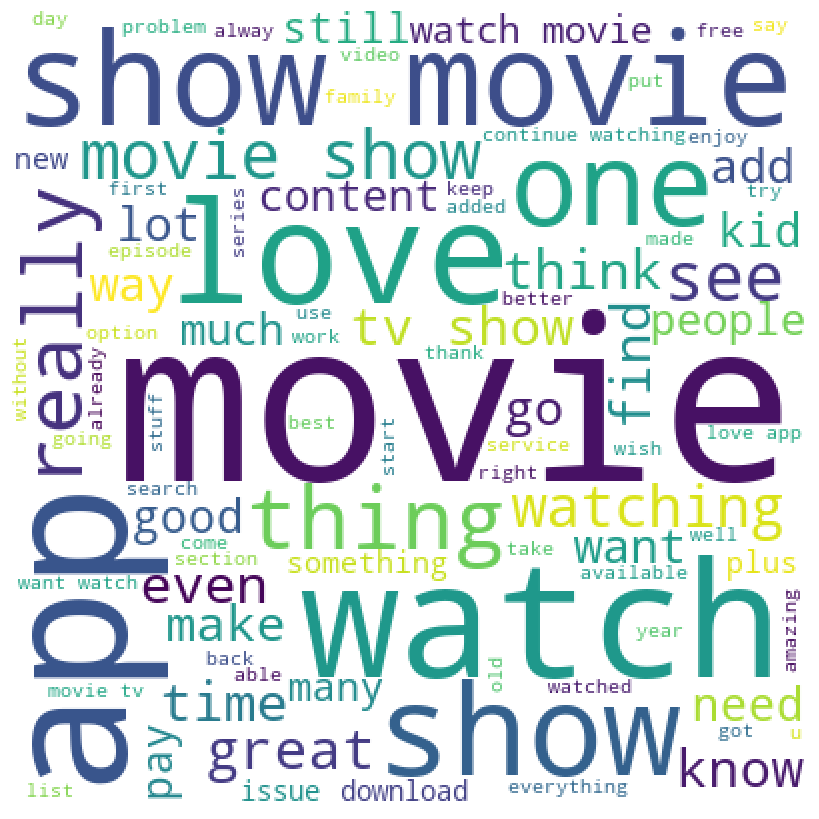

In [614]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in final1_df[final1_df['Cluster']==0]['review_cleaned']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

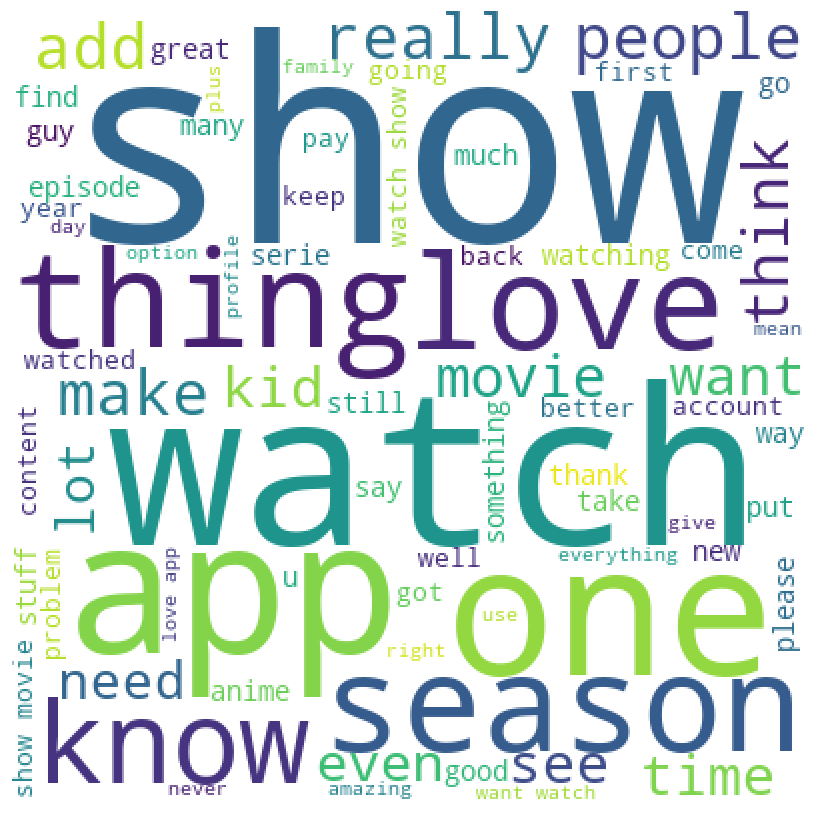

In [620]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in final1_df[final1_df['Cluster']==4]['review_cleaned']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

The popular words in each cluster look similar because they are all reviews on the streaming apps, popular words will be quite similar even if they convey different messages. 


i.e I like to watch shows on Netflix v.s I hate to watch shows on Netflix

#### I decided to found the difference between clusters based on their emotions.

In [69]:
pd.reset_option('display.max_colwidth')
count = final1_df.groupby('Cluster').review.count()
rating_mean = final1_df.groupby('Cluster').rating.mean()
positive_mean = final1_df.groupby('Cluster').positive.mean()
negative_mean = final1_df.groupby('Cluster').negative.mean()
anger_mean = final1_df.groupby('Cluster').anger.mean()
surprise_mean = final1_df.groupby('Cluster').surprise.mean()
fear_mean = final1_df.groupby('Cluster').fear.mean()
anticipation_mean = final1_df.groupby('Cluster').anticipation.mean()
trust_mean = final1_df.groupby('Cluster').trust.mean()
sadness_mean = final1_df.groupby('Cluster').sadness.mean()
disgust_mean = final1_df.groupby('Cluster').disgust.mean()
joy_mean = final1_df.groupby('Cluster').joy.mean()

# Combine the results into one DataFrame
combined_df = pd.concat([count,rating_mean,positive_mean, negative_mean, anger_mean,surprise_mean,fear_mean,anticipation_mean,trust_mean,sadness_mean,disgust_mean,joy_mean], axis=1)
combined_df.columns = ['count','AVG Rating','AVG Positive', 'AVG Negative', 'AVG Anger','AVG Surprise','AVG Fear','AVG Anticipation','AVG Trust','AVG Sadness','AVG Disgust','AVG Joy']

print(combined_df)

         count  AVG Rating  AVG Positive  AVG Negative  AVG Anger  \
Cluster                                                             
0          782    3.117647      0.370844      0.182864   0.014066   
1         1703    3.786260      0.441574      0.120963   0.011744   
2          486    2.333333      0.261317      0.275720   0.072016   
3         1285    3.823346      0.556420      0.098833   0.012451   
4         2953    2.638673      0.442262      0.287504   0.032848   

         AVG Surprise  AVG Fear  AVG Anticipation  AVG Trust  AVG Sadness  \
Cluster                                                                     
0            0.019182  0.106138          0.281330   0.419437     0.042199   
1            0.009982  0.106283          0.197299   0.417499     0.017616   
2            0.043210  0.174897          0.450617   0.353909     0.041152   
3            0.007782  0.076265          0.243580   0.337743     0.014008   
4            0.027430  0.124280          0.270911   0.

Cluster 0: Trust, low anger => General Review\
Cluster 1: High Rating, less positive compared to Cluster 3 =>  Positive Review with Feedback for Improvement\
Cluster 2: Angry, low rating, anticipation, disgust =>  Aggressive Review\
Cluster 3: Positive, high rating, happy =>  Satisfactory Review\
Cluster 4: Both positive & negative, low rating, sad =>  Disappointing Review



In [70]:
final1_df.groupby('Cluster').review.apply(lambda x: np.mean(x.str.len()))

Cluster
0    527.378517
1    575.837933
2    406.958848
3    574.161868
4    495.416187
Name: review, dtype: float64

In [71]:
 np.bincount(clusters)

array([ 782, 1703,  486, 1285, 2953], dtype=int64)

#### Cluster 0: General Review with Technical Issue (Trust, low anger)

In [132]:
pd.set_option('display.max_colwidth', None)
final1_df[final1_df['Cluster']==0]['review'].head(5)

date
2022-02-08 11:19:14    The app works but without exaggerating, I run into bugs almost every time I use the app. This is because my most frequent interactions (pausing and rewinding) for watching stuff HAVE BUGS. (1) Pausing and resuming video will make upcoming subtitles skip. So I need to rewind to catch the subtitles. Which brings up (2) rewinding more than once will cause video to freeze so I need to close and reopen the show (this gets annoying when it’s near the end of an episode so it opens the next one instead). And I need to rewind more than once very often because of the first bug. An example of this scenario is if I pause video and resume. Then it shows the current subtitle, but then the subtitle after is skipped. So I need to rewind back twice, which causes the video to freeze. I really feel like Netflix should have fixed pausing and rewinding video correctly by now since these are basic parts of playing video. It’s incredibly frustrating to get hit with 2 back to back 

#### Cluster 1: Positive Rating with feedback for improvement (High Rating, less positive compared to Cluster 3)

In [131]:
pd.set_option('display.max_colwidth', None)
final1_df[final1_df['Cluster']==1]['review'].head(5)

date
2021-10-05 03:57:33    Overall a great app but there are some things that could be better. CAN YOU PLEASE ADD A TEEN SECTION, its so hard to find anything good that isn’t rated TV-MA because my parents wont let me watch anything thats TV-MA. Second, CAN YOU PLEASE STOP CANCELING SHOWS. Like most of the good shows that me and a lot of other people like got canceled, whereas these completely dumb shows got like 12 seasons or a sequel. Which brings me to my next request, can you please take away all the bad elementary school shows that make me want to pull my hair out (my sister and my mom make me watch them i would never watch willingly) like kid danger, and teen love story's that basically all go the same way like the kissing booth or tall girl. Also kinda an add-on to my first request but can you make a teen profile. Like how the kid profiles are but for teens. Like there would be no nudity or extreme violence, or kids stuff like cocomelon or stuff like  what I said in request 3. 

In [91]:
condition1 = (final1_df['Cluster'] == 1) & (final1_df['review'].str.contains('but', case=False) | final1_df['review'].str.contains('however', case=False)| final1_df['review'].str.contains('But', case=False)| final1_df['review'].str.contains('However', case=False))
count_condition1 = final1_df[condition1].shape[0]
print(count_condition1/len(final1_df[final1_df['Cluster'] == 1]['review']))

0.7193188490898414


In [92]:
condition3 = (final1_df['Cluster'] == 3) & (final1_df['review'].str.contains('but', case=False) | final1_df['review'].str.contains('however', case=False)| final1_df['review'].str.contains('But', case=False)| final1_df['review'].str.contains('However', case=False))
count_condition3 = final1_df[condition3].shape[0]

print(count_condition3/len(final1_df[final1_df['Cluster'] == 3]['review']))

0.6607003891050583


In [122]:
condition = (final1_df['Cluster'] == 0) & (final1_df['review'].str.contains('but', case=False) | final1_df['review'].str.contains('however', case=False)| final1_df['review'].str.contains('But', case=False)| final1_df['review'].str.contains('However', case=False))
count_condition = final1_df[condition].shape[0]
print(count_condition/len(final1_df[final1_df['Cluster'] == 0]['review']))

0.6572890025575447


In [124]:
condition = (final1_df['Cluster'] == 2) & (final1_df['review'].str.contains('but', case=False) | final1_df['review'].str.contains('however', case=False)| final1_df['review'].str.contains('But', case=False)| final1_df['review'].str.contains('However', case=False))
count_condition = final1_df[condition].shape[0]
print(count_condition/len(final1_df[final1_df['Cluster'] == 2]['review']))

0.5802469135802469


In [125]:
condition = (final1_df['Cluster'] == 4) & (final1_df['review'].str.contains('but', case=False) | final1_df['review'].str.contains('however', case=False)| final1_df['review'].str.contains('But', case=False)| final1_df['review'].str.contains('However', case=False))
count_condition = final1_df[condition].shape[0]
print(count_condition/len(final1_df[final1_df['Cluster'] == 4]['review']))

0.6068405011852354


In [110]:
# Filter the data for Cluster 3 with 'but' or 'however' occurrences
cluster_1_reviews = final1_df[final1_df['Cluster'] == 1]

# Get the sample size and count of 'but' or 'however' occurrences in Cluster 3
sample_size_cluster_1 = len(cluster_1_reviews)
count_but_or_however_cluster_1 = cluster_1_reviews['review'].str.contains(r'\b(?:but|however|But|However)\b', case=False).sum()

# Calculate the standard deviation for the occurrences in Cluster 3
std_but_or_however_cluster_1 = cluster_1_reviews['review'].str.contains(r'\b(?:but|however|But|However)\b', case=False).std()

print("Number of 'but' or 'however' occurrences in Cluster 1:", count_but_or_however_cluster_1)
print("Sample size of Cluster 1:", sample_size_cluster_1)
print("Standard deviation of occurrences in Cluster 1:", std_but_or_however_cluster_1)


Number of 'but' or 'however' occurrences in Cluster 1: 1207
Sample size of Cluster 1: 1703
Standard deviation of occurrences in Cluster 1: 0.4544722510668462


In [109]:
# Filter the data for Cluster 3 with 'but' or 'however' occurrences
cluster_3_reviews = final1_df[final1_df['Cluster'] == 3]

# Get the sample size and count of 'but' or 'however' occurrences in Cluster 3
sample_size_cluster_3 = len(cluster_3_reviews)
count_but_or_however_cluster_3 = cluster_3_reviews['review'].str.contains(r'\b(?:but|however|But|However)\b', case=False).sum()

# Calculate the standard deviation for the occurrences in Cluster 3
std_but_or_however_cluster_3 = cluster_3_reviews['review'].str.contains(r'\b(?:but|however|But|However)\b', case=False).std()

print("Number of 'but' or 'however' occurrences in Cluster 3:", count_but_or_however_cluster_3)
print("Sample size of Cluster 3:", sample_size_cluster_3)
print("Standard deviation of occurrences in Cluster 3:", std_but_or_however_cluster_3)


Number of 'but' or 'however' occurrences in Cluster 3: 833
Sample size of Cluster 3: 1285
Standard deviation of occurrences in Cluster 3: 0.4777026411132193


P-Value = 0.0006

#### Cluster 2: Aggressive Review (Angry, low rating, anticipation, disgust)

In [130]:
pd.set_option('display.max_colwidth', None)
final1_df[final1_df['Cluster']==2]['review'].head(5)

date
2023-06-25 22:23:29                                                     My family used Netflix for years, it was convenient knowing how many options of movies and shows there were to watch. Now with the new update we can’t log into Netflix outside our own home. So watching while on the road, at work or traveling has become an issue. I understand you can set a temporary travel account, however it only works for 30 days. This has become a massive inconvenience and has just made the platform a lot harder to deal with. Now sometimes we get kicked out of our Netflix account when it’s from our own Tv or laptop. \n\nAnother huge issue, Netflix has officially now started playing ads. This was a big shock to my family. When one day we where watching a movie and a literal ad started playing in the middle of it. This bumped us out very much. There are already so many platforms that play ads and the main reason we stayed with Netflix for so long is the uninterrupted screen time. I know there 

#### Cluster 3: Satisfactory Review (Positive, high rating, happy)

In [133]:
pd.set_option('display.max_colwidth', None)
final1_df[final1_df['Cluster']==3]['review'].head(5)

date
2020-03-05 23:01:35                                                                                                                                                                                    I love Netflix and admittedly have things streaming far too often throughout the day. Everything works beautifully and it’s easy to search for what you’re looking for and the list of saved shows is fine too. My big issue, however, is with the currently watching area on the tv app, phone app, and website. Sure there are tons (and I mean TONS) of articles all over the web giving instructions on how to remove shows from the currently watching section that you no longer want to view, but Netflix it’s your job to provide an easier method for doing this. It’s unrealistic to expect people to go into their history and delete a millions episodes of a show just to get to the movies and whatever other shows they need to remove from that section. Just allow a space on the titles to remove them fro

#### Cluster 4: Disappointing Review (Both positive & negative, low rating, sad)

In [626]:
final1_df.groupby('Cluster').review.apply(lambda x: np.mean(x.str.len()))

Cluster
0    573.594761
1    405.857438
2    495.528951
3    525.791826
4    576.157494
Name: review, dtype: float64

In [134]:
pd.set_option('display.max_colwidth', None)
final1_df[final1_df['Cluster']==4]['review'].head(5)

date
2023-05-10 14:20:32    i thought it was great that i got this subscription from tmobile for the life of my account which is not going to be as long as i intended  hackers from my neighborhood have taken over this account i can hardly watch or play a game thru them  i just deleted the game i had (kittens ) through them i have no game from them or any other source  i enjoyed the game but it increasingly became harder to play with ten other people playing and downloading it from my account  at first i tried  deleting it and when i downloaded again it came with everything still there same level checked my settings on phone i was set to delete after some time i decided i liked the game so i got it back still everything was still there well all that has ended now i deleted the game so no activity right... wrong  ! i am now having to log out , changed password cant tell you how many time only to find two to four people logged into my account  my account i logged them out but they have a 

In [137]:
cluster_review_type = {
    0: 'General Review with Technical Issue',
    1: 'Positive Review with Feedback for Improvement',
    2: 'Aggressive Review',
    3: 'Satisfactory Review',
    4: 'Disappointing Review'
}

final1_df['Review Type'] = final1_df['Cluster'].map(cluster_review_type)

In [26]:
merged_df = pd.merge(df_label, result_df[['date','review', 'Unnamed: 0']], on=['review', 'Unnamed: 0'], how='inner')

print(merged_df)

      Unnamed: 0                                             review  rating  \
0              0  Overall a great app but there are some things ...       4   
1              1  i thought it was great that i got this subscri...       2   
2              2  1. There should be a feature where you have to...       4   
3              3  I have been using Netflix for years now. It is...       5   
4              4  I was scrolling through Netflix and I had a wo...       4   
...          ...                                                ...     ...   
7204        2453  Please fix the audio! It will not play the sou...       1   
7205        2454  This app has been getting stuck and buffering,...       3   
7206        2455  Very buggy app! Seems to have a mind of its ow...       2   
7207        2456  Had this problem a month or so ago and it got ...       1   
7208        2457  Every week these is something wrong with the l...       1   

      isEdited                                     

In [29]:
csv_filename = 'final_df.csv'

merged_df.to_csv(csv_filename, index=False)

In [27]:
merged_df

,Unnamed: 0,review,rating,isEdited,title,userName,App,developerResponse,review_cleaned,category,...,trust,surprise,positive,negative,sadness,disgust,joy,Cluster,Review Type,date
0,0,Overall a great app but there are some things ...,4,False,PLEASE READ NETFLIX,SERIOUS PERSON PLEASE READ,Netflix,NaN,overall great app thing could better please ad...,High,...,0,0,0,1,0,0,0,1,Positive Review with Feedback for Improvement,2021-10-05 03:57:33
1,1,i thought it was great that i got this subscri...,2,False,hacker in my neighborhood taking over my netflix,hacked out in tomball,Netflix,NaN,thought great got subscription tmobile life ac...,Low,...,1,0,0,0,0,0,0,4,Disappointing Review,2023-05-10 14:20:32
2,2,1. There should be a feature where you have to...,4,False,Could be better,BlazeeOfficial,Netflix,NaN,1 feature enter account password many people e...,High,...,1,0,0,0,0,0,0,1,Positive Review with Feedback for Improvement,2021-12-30 14:48:36
3,3,I have been using Netflix for years now. It is...,5,False,Wow!,Rising17,Netflix,NaN,using year amazing unlimited show age show typ...,High,...,1,0,0,0,0,0,0,1,Positive Review with Feedback for Improvement,2022-10-25 17:26:12
4,4,I was scrolling through Netflix and I had a wo...,4,False,IDEA FROM A CONSUMER/VIEWER.,AwesoMapes,Netflix,NaN,scrolling wonderful thought decided act write ...,High,...,0,0,0,0,0,0,0,1,Positive Review with Feedback for Improvement,2022-03-13 15:55:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,2453,Please fix the audio! It will not play the sou...,1,False,😡,Lovelee212,hulu,NaN,please fix audio play sound open app unless cl...,Low,...,0,0,0,1,0,0,0,4,Disappointing Review,2023-04-12 12:07:09
7205,2454,"This app has been getting stuck and buffering,...",3,False,Needs to stop buffering,Tinacology,hulu,NaN,app getting stuck buffering annoying sure wort...,Medium,...,0,0,1,1,0,0,0,4,Disappointing Review,2022-12-03 04:56:43
7206,2455,Very buggy app! Seems to have a mind of its ow...,2,False,Freezes and stops out of the blue.,truth bomb 73,hulu,NaN,buggy app seems mind freeze randomly even last...,Low,...,0,1,0,0,0,0,0,4,Disappointing Review,2023-02-08 10:24:41
7207,2456,Had this problem a month or so ago and it got ...,1,False,Crashes to Home Screen,Colorado11,hulu,NaN,problem month ago got fixed channel kktv color...,Low,...,0,0,0,1,1,0,0,4,Disappointing Review,2023-01-30 02:14:08
